<a href="https://colab.research.google.com/github/xvilaysouk/NTL_DMFA/blob/main/NTL_DMFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R Notebook for Publications Titled: Estimating the total in-use stock of Laos using dynamic material flow analysis and nighttime light

Xaysackda Vilaysouk(a,*), Kamrul Islam(b), Alessio Miatto(c), Heinz Schandl(d), Shinsuke Murakami(b,e), Seiji Hashimoto(f)


---


(a) Research Organization of Science and Technology, Ritsumeikan University, 1-1-1 Noji-Higashi, Kusatsu, Shiga 525-8577, Japan

(b) Department of Systems Innovation, Graduate School of Engineering, The University of Tokyo, 7-3-1 Hongo, Bunkyo-ku, Tokyo 113-8656, Japan

(c) School of the Environment, Yale University, 195 Prospect St, New Haven, CT, 06511, USA

(d) CSIRO, Black Mountain Science and Innovation Park, Clunies Ross Street, Acton, ACT 2601 Canberra, Australia

(e) Department of Technology Management for Innovation, Graduate School of Engineering, The University of Tokyo, 7-3-1 Hongo, Bunkyo-ku, Tokyo 113-8656, Japan

(f) College of Science and Engineering, Ritsumeikan University, 1-1-1 Noji-Higashi, Kusatsu, Shiga 525-8577, Japan


---


*Corresponding author email: xaysackd@fc.ritsumei.ac.jp; xaysackda.vls@gmail.com


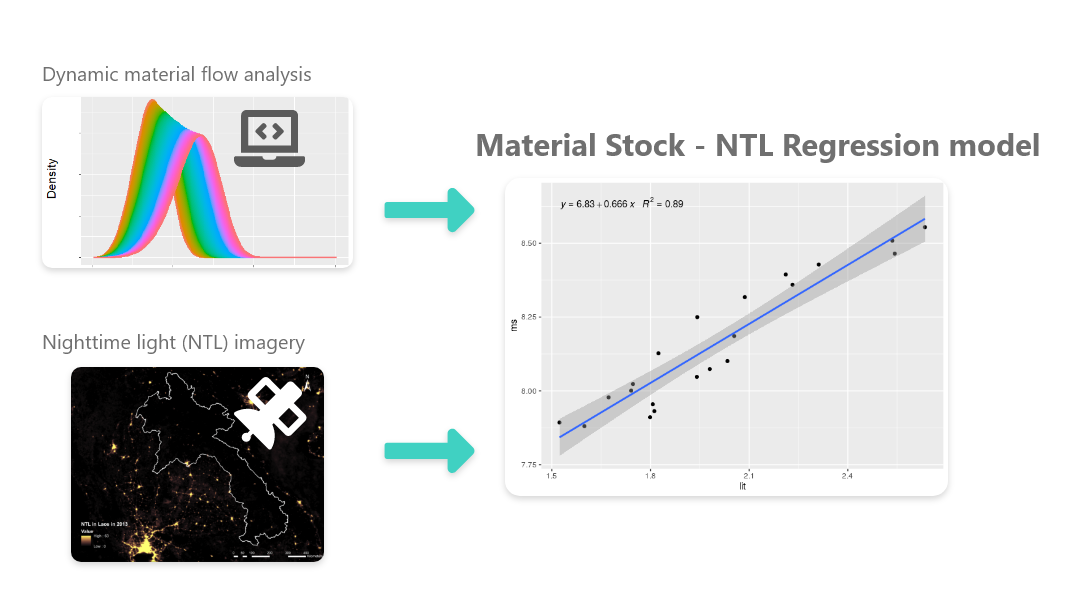



# Download Packages when run this Notebook from Google Colab

In [ ]:
# Comment this out if you have already have these packages installed
install.packages(c("reshape2","readxl","ggpubr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(reshape2)
library(readxl)
library(ggpubr)

# **Load Material stock dataset**

In [ ]:
dt <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/ms.csv")
head(dt)

,year,crop_residues,wood_furniture,wood_construction,iron,other_metals,nonmetallic_con,nonmetallic_indus,total
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1950,17342.83,16371.94,142472.2,5029.455,4834.171,1232365,31128.87,1449545
2,1951,34685.66,32430.73,282219.4,9962.700,9411.552,2441158,61662.19,2871530
3,1952,52323.53,48793.20,424609.2,14987.143,13523.918,3672810,92594.86,4319642
4,1953,68346.33,65473.28,569762.9,20086.783,17100.464,4928370,121844.20,5790984
5,1954,78049.15,82486.45,717826.0,25212.102,20199.523,6209095,145864.58,7278733
6,1955,82469.19,99768.77,868944.0,30290.132,22904.379,7516244,163428.94,8784049


# **📊Plot In-use stock**

**Total In-use Material Stock**

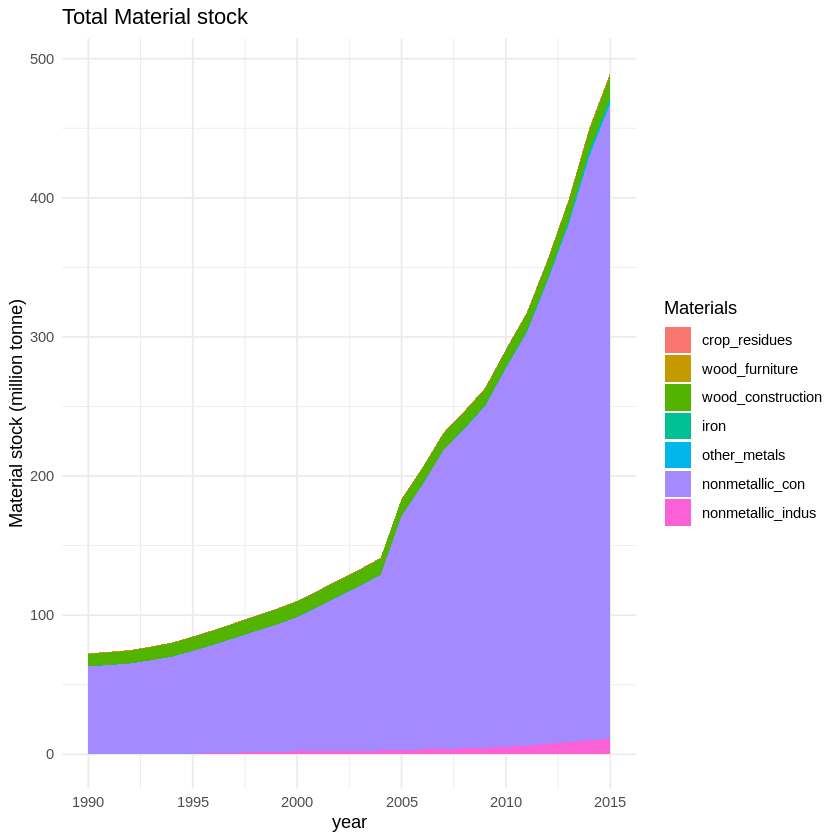

In [ ]:
dt_total_ms <- dt %>% dplyr::filter(year>1989) %>% melt(id.vars= "year") %>% mutate(text = paste(variable,":",value))

total_ms_fig <- dt_total_ms %>% filter(variable != "total") %>% ggplot() + geom_area(aes(x=year, y = value/1e6, fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "Material stock (million tonne)", x = "year", title = "Total Material stock" , fill ="Materials") + theme_minimal()

total_ms_fig

**In-use stock of Biomass**

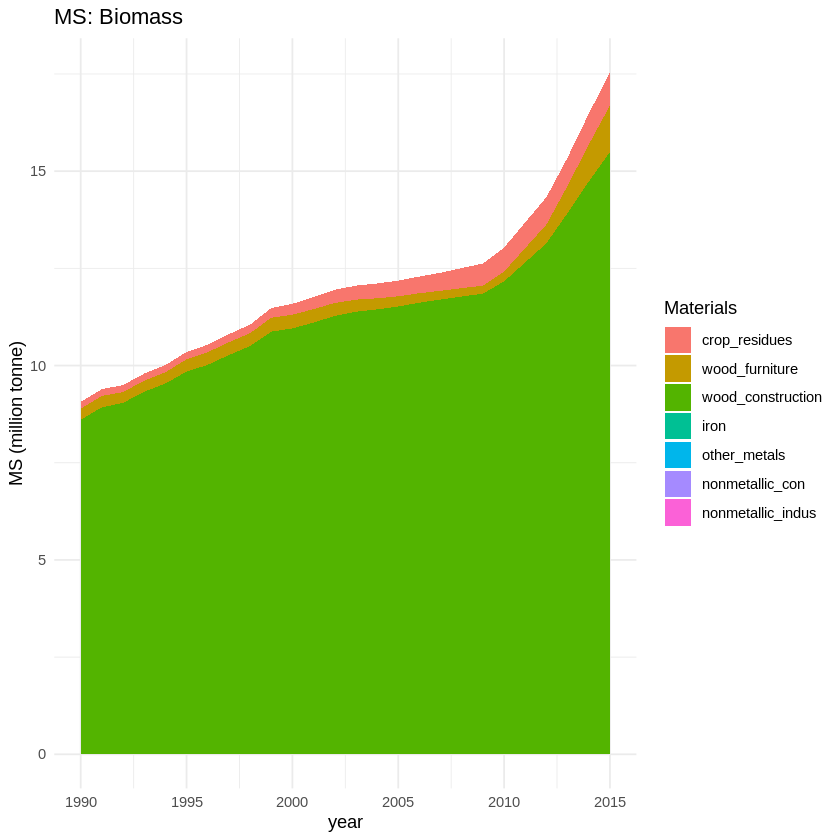

In [ ]:
dt_ms_biomass <- dt %>% filter(year>1989) %>% dplyr::select(-total) 
dt_ms_biomass[,5:8] <- 0 
dt_ms_biomass <- dt_ms_biomass %>% mutate(total_biomass = rowSums(.[2:4]))%>% melt(id.vars= "year")

ms_biomass_fig <- ggplot() + 
        geom_area(data = dt_ms_biomass %>% filter(variable != "total_biomass"),aes(x=year, y = value/1e6, fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "MS (million tonne)", x = "year", title = "MS: Biomass", fill ="Materials") + theme_minimal()

ms_biomass_fig

**In-use stock of Metals**

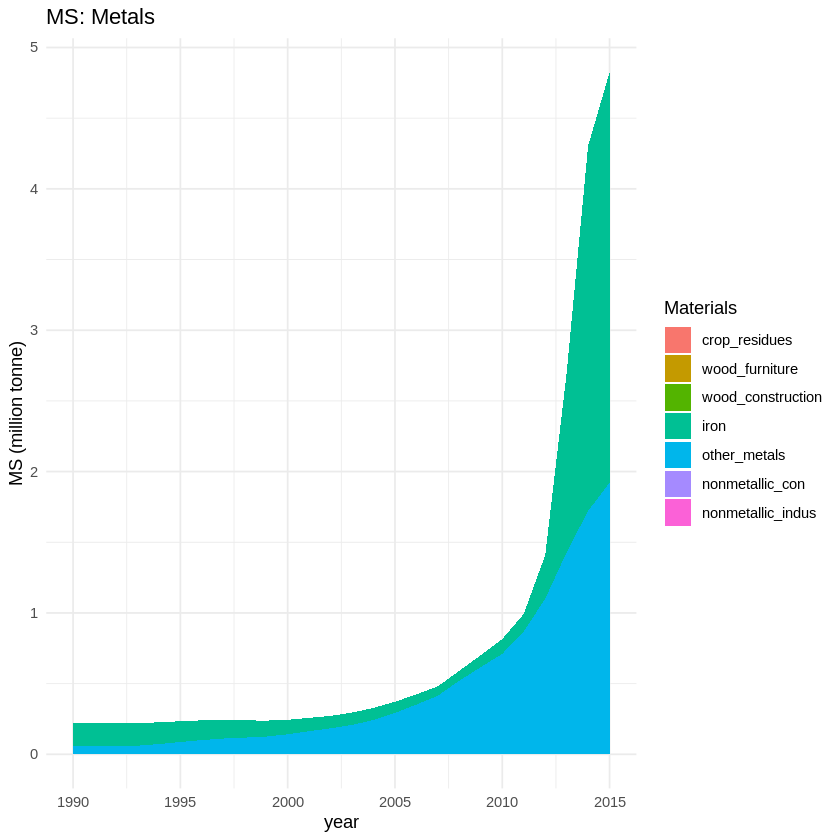

In [ ]:
dt_ms_metal <- dt %>% filter(year>1989) %>% dplyr::select(-total) 
dt_ms_metal[,c(2:4,7:8)] <- 0 
dt_ms_metal <- dt_ms_metal %>% mutate(total_metal = rowSums(.[5:6]))%>% melt(id.vars= "year")

ms_metal_fig <- ggplot() + 
        geom_area(data = dt_ms_metal %>% filter(variable != "total_metal"),aes(x=year, y = value/1e6, fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "MS (million tonne)", x = "year", title = "MS: Metals", fill ="Materials") + theme_minimal()
ms_metal_fig

**In-use stock of Non-metallic minerals**

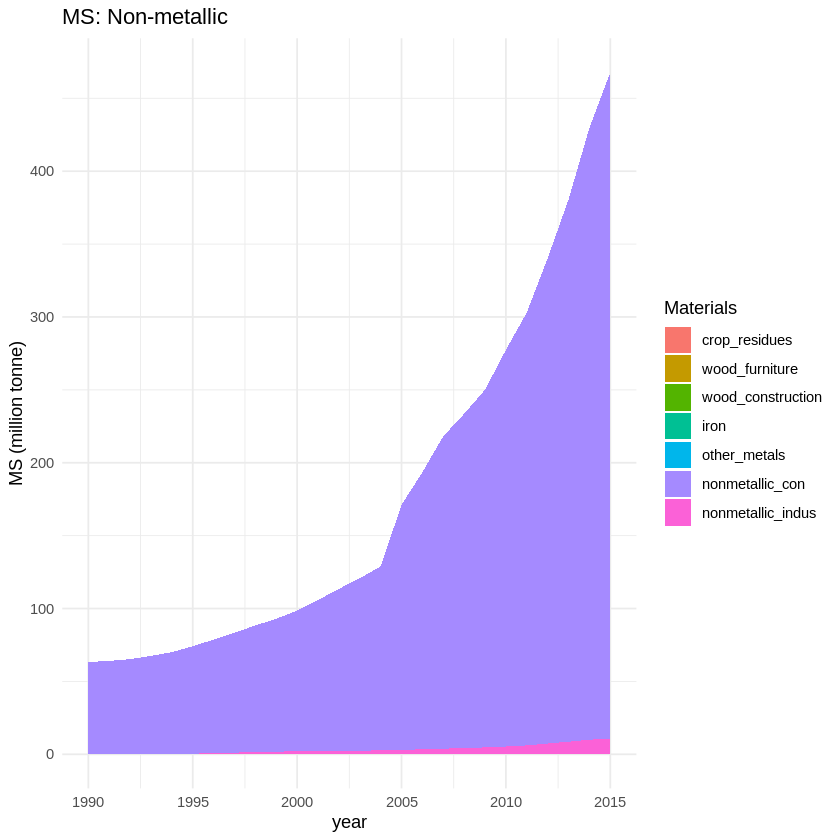

In [ ]:
dt_ms_nonmetallic <- dt %>% filter(year>1989) %>% dplyr::select(-total) 
dt_ms_nonmetallic[,2:6] <- 0 
dt_ms_nonmetallic <- dt_ms_nonmetallic %>% mutate(total_nonmetallic= rowSums(.[7:8]))%>% melt(id.vars= "year")

ms_nonmetallic_fig <- ggplot() + 
        geom_area(data = dt_ms_nonmetallic %>% filter(variable != "total_nonmetallic"),aes(x=year, y = value/1e6, fill = variable)) +
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "MS (million tonne)", x = "year", title = "MS: Non-metallic", fill ="Materials") + theme_minimal()
ms_nonmetallic_fig

**Total In-use stock**

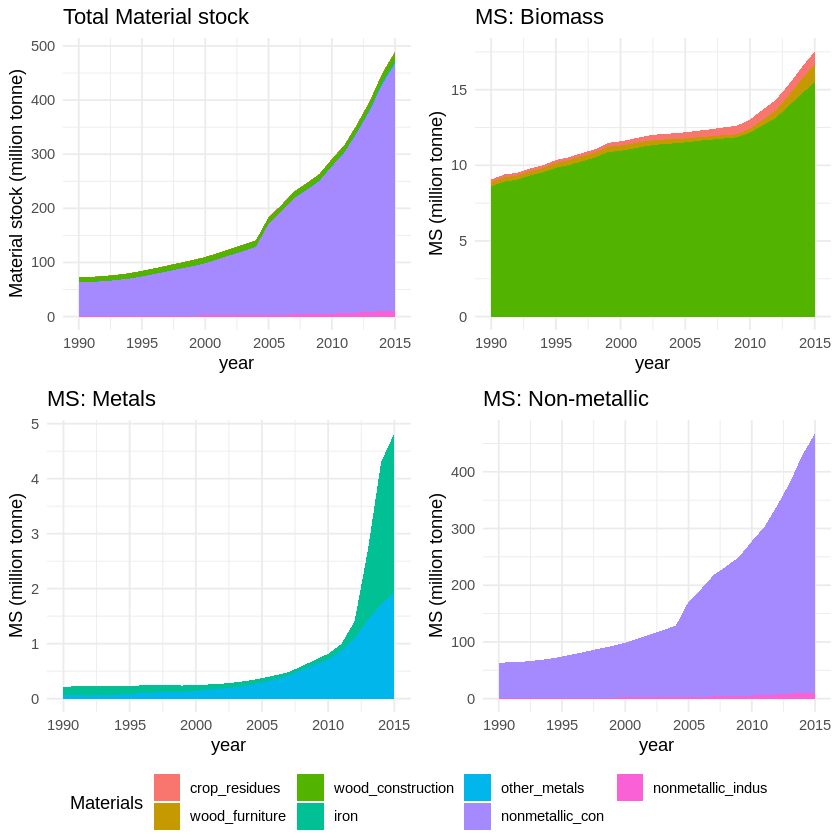

In [ ]:
fig_forpub <- ggarrange(total_ms_fig, ms_biomass_fig ,ms_metal_fig, ms_nonmetallic_fig, common.legend = TRUE, legend="bottom", nrow = 2, ncol = 2)
fig_forpub

# **📊Plot Inflow**

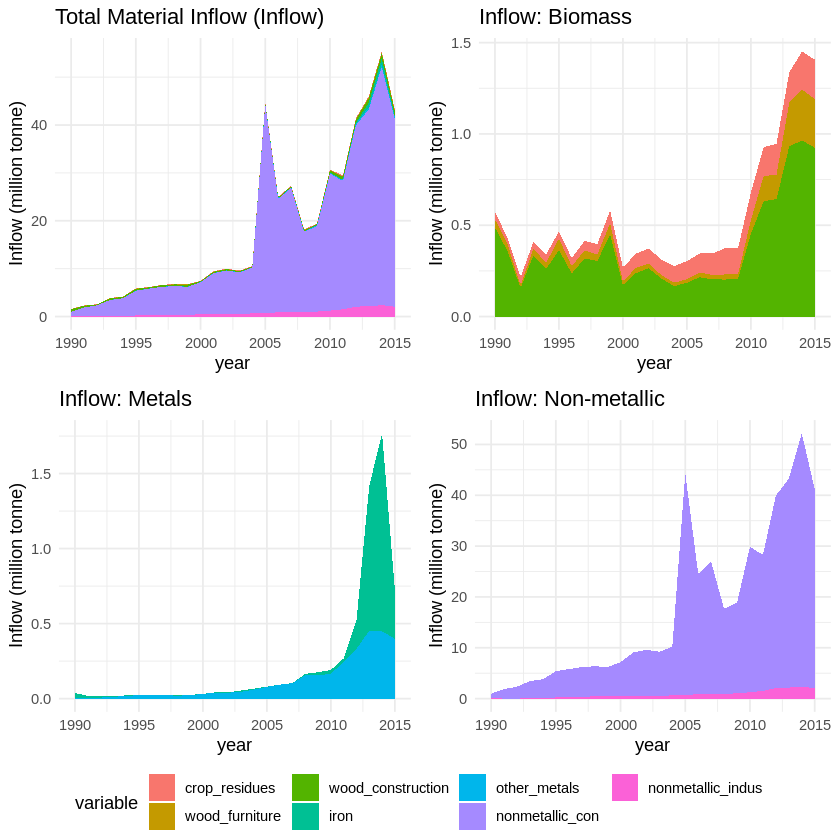

In [ ]:
#Load inflow data from github
dt_inflow <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/inflow.csv")
dt_total_inflow <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/inflow.csv") %>% filter(year>1989) %>% melt(id.vars= "year") 

total_inflow_fig <- ggplot() + 
        geom_area(data = dt_total_inflow  %>% filter(variable != "total"),aes(x=year, y = value/1e6,  fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "Inflow (million tonne)", x = "year", title = "Total Material Inflow (Inflow)") + theme_minimal()

dt_inflow_biomass <- dt_inflow %>% filter(year>1989) %>% dplyr::select(-total) 
dt_inflow_biomass[,5:8] <- 0 
dt_inflow_biomass <- dt_inflow_biomass %>% mutate(total_biomass = rowSums(.[2:4]))%>% melt(id.vars= "year")

inflow_biomass_fig <- ggplot() + 
        geom_area(data = dt_inflow_biomass %>% filter(variable != "total_biomass"),aes(x=year, y = value/1e6,  fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "Inflow (million tonne)", x = "year", title = "Inflow: Biomass") + theme_minimal()


dt_inflow_metal <- dt_inflow %>% filter(year>1989) %>% dplyr::select(-total) 
dt_inflow_metal[,c(2:4,7:8)] <- 0 
dt_inflow_metal <- dt_inflow_metal %>% mutate(total_metal = rowSums(.[5:6]))%>% melt(id.vars= "year")

inflow_metal_fig <- ggplot() + 
        geom_area(data = dt_inflow_metal %>% filter(variable != "total_metal"),aes(x=year, y = value/1e6,  fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "Inflow (million tonne)", x = "year", title = "Inflow: Metals") + theme_minimal()

dt_inflow_nonmetallic <- dt_inflow %>% filter(year>1989) %>% dplyr::select(-total) 
dt_inflow_nonmetallic[,2:6] <- 0 
dt_inflow_nonmetallic <- dt_inflow_nonmetallic %>% mutate(total_nonmetallic= rowSums(.[7:8]))%>% melt(id.vars= "year")

inflow_nonmetallic_fig <- ggplot() + 
        geom_area(data = dt_inflow_nonmetallic %>% filter(variable != "total_nonmetallic"),aes(x=year, y = value/1e6,  fill = variable)) +
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "Inflow (million tonne)", x = "year", title = "Inflow: Non-metallic") + theme_minimal()

fig_inflow_forpub <- ggarrange(total_inflow_fig, inflow_biomass_fig,inflow_metal_fig, inflow_nonmetallic_fig, nrow = 2, ncol = 2, common.legend = TRUE, legend="bottom")
fig_inflow_forpub

#📊Plot Outflow

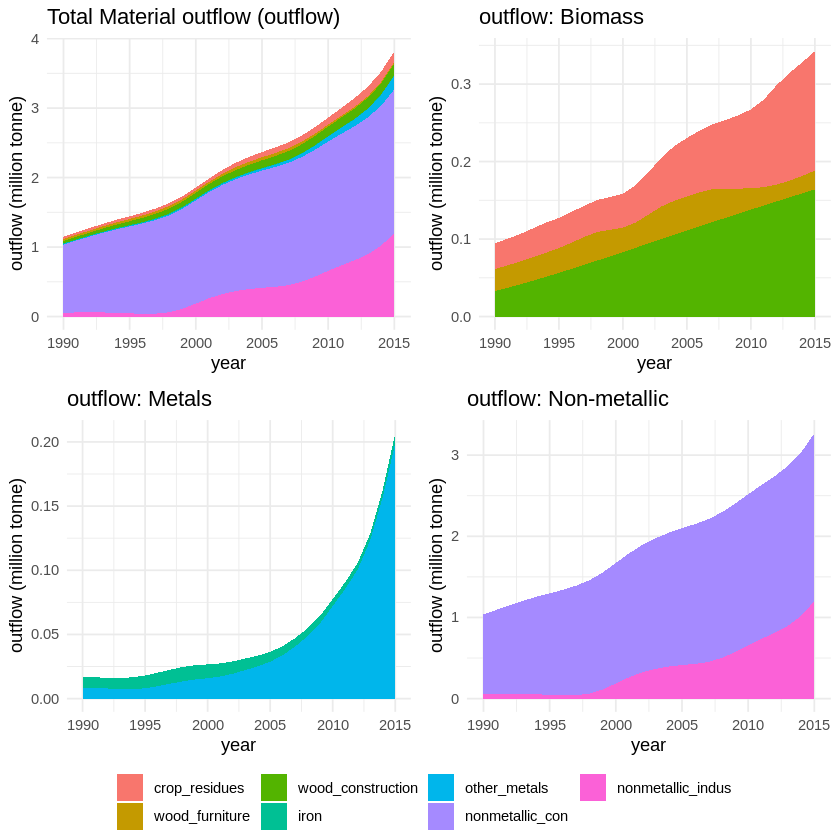

In [ ]:

dt_outflow <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/outflow.csv")
dt_total_outflow <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/outflow.csv") %>% filter(year>1989) %>% melt(id.vars= "year") 

total_outflow_fig <- ggplot() + 
        geom_area(data = dt_total_outflow  %>% filter(variable != "total"),aes(x=year, y = value/1e6,  fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "outflow (million tonne)", x = "year", title = "Total Material outflow (outflow)", fill = "") + theme_minimal()

dt_outflow_biomass <- dt_outflow %>% filter(year>1989) %>% dplyr::select(-total) 
dt_outflow_biomass[,5:8] <- 0 
dt_outflow_biomass <- dt_outflow_biomass %>% mutate(total_biomass = rowSums(.[2:4]))%>% melt(id.vars= "year")

outflow_biomass_fig <- ggplot() + 
        geom_area(data = dt_outflow_biomass %>% filter(variable != "total_biomass"),aes(x=year, y = value/1e6,  fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "outflow (million tonne)", x = "year", title = "outflow: Biomass") + theme_minimal()


dt_outflow_metal <- dt_outflow %>% filter(year>1989) %>% dplyr::select(-total) 
dt_outflow_metal[,c(2:4,7:8)] <- 0 
dt_outflow_metal <- dt_outflow_metal %>% mutate(total_metal = rowSums(.[5:6]))%>% melt(id.vars= "year")

outflow_metal_fig <- ggplot() + 
        geom_area(data = dt_outflow_metal %>% filter(variable != "total_metal"),aes(x=year, y = value/1e6,  fill = variable)) + 
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "outflow (million tonne)", x = "year", title = "outflow: Metals") + theme_minimal()

dt_outflow_nonmetallic <- dt_outflow %>% filter(year>1989) %>% dplyr::select(-total) 
dt_outflow_nonmetallic[,2:6] <- 0 
dt_outflow_nonmetallic <- dt_outflow_nonmetallic %>% mutate(total_nonmetallic= rowSums(.[7:8]))%>% melt(id.vars= "year")

outflow_nonmetallic_fig <- ggplot() + 
        geom_area(data = dt_outflow_nonmetallic %>% filter(variable != "total_nonmetallic"),aes(x=year, y = value/1e6,  fill = variable)) +
        scale_y_continuous() + guides(alpha = F)+
        labs(y= "outflow (million tonne)", x = "year", title = "outflow: Non-metallic") + theme_minimal()


fig_outflow_forpub <- ggarrange(total_outflow_fig + guides(flil = F, color =F), outflow_biomass_fig, outflow_metal_fig , outflow_nonmetallic_fig, nrow = 2, ncol = 2, common.legend = TRUE, legend="bottom")
fig_outflow_forpub

#📊Plot In-use stock per capita

Warning message in dt_ms_comp$ms_global/dt_pop_mdp$Global:
“longer object length is not a multiple of shorter object length”
Warning message in cbind(year = dt_ms_comp$year, ms_jp = dt_ms_comp$ms_jp, ms_usa = dt_ms_comp$ms_usa, :
“number of rows of result is not a multiple of vector length (arg 1)”
Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


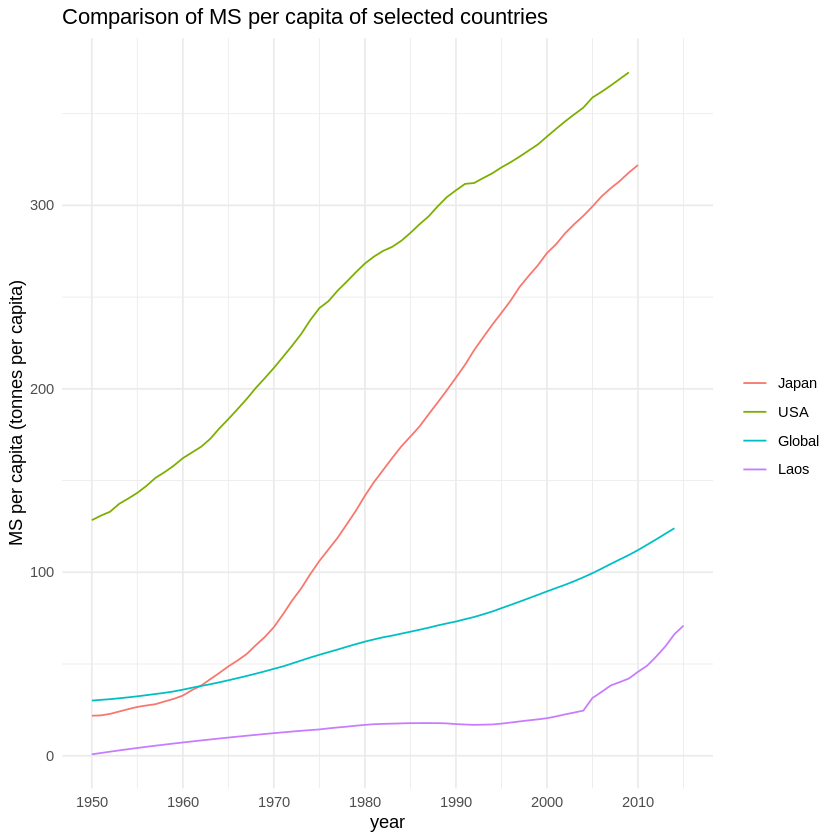

In [ ]:
#Load dataset for Japan
dt_ms_jp <- read.csv("https://raw.githubusercontent.com/xvilaysouk/extracted-data-from-figures/master/Fishman.%20T%2C%202014/Stock%20per%20cap%20in%20Japan")
names(dt_ms_jp)[1] <- "year"
names(dt_ms_jp)[2] <- "ms"
dt_ms_jp <- dt_ms_jp %>% mutate_at(vars(year), funs(round(., 0))) %>% mutate_at(vars(ms), funs(round(., 1))) %>% filter(year>1949)

#Load dataset for USA
dt_ms_usa <- read.csv("https://raw.githubusercontent.com/xvilaysouk/extracted-data-from-figures/master/Fishman.%20T%2C%202014/Stock%20per%20cap%20in%20US")
names(dt_ms_usa)[1] <- "year"
names(dt_ms_usa)[2] <- "ms"
dt_ms_usa <- dt_ms_usa %>% mutate_at(vars(year), funs(round(., 0))) %>% mutate_at(vars(ms), funs(round(., 1))) %>% filter(year>1949)

#Load dataset for global
dt_ms_global <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/global_ms.csv")
dt_outflow_global <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/outflow.csv")

#Join dataset
dt_ms_comp <-  full_join (dt_ms_global,dt_ms_jp, by = "year")
dt_ms_comp <- dt_ms_comp %>% rename(ms_jp = ms, ms_global = total)
dt_ms_comp <- dt_ms_comp %>% dplyr::select(year, ms_global, ms_jp)

dt_ms_comp <-  full_join (dt_ms_comp,dt_ms_usa, by = "year")
dt_ms_comp <- dt_ms_comp %>% rename(ms_usa = ms)

#Load population dataset
dt_pop_mdp <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/pop_mdp.csv") %>% filter(year>1899 & year <2016) %>% dplyr::select("year","Global", "Japan", "United.States", contains("Lao"))

#Calculate MS per capita Global
mspercap_global <- dt_ms_comp$ms_global/dt_pop_mdp$Global*10^6


#Calculate MS per capita for Laos
pop_lao <- dt_pop_mdp %>% filter(year >1949) %>% dplyr::select(contains("Lao"))
mspercap_laos <- dt$total / pop_lao /1000
mspercap_laos <- mspercap_laos %>% mutate(year = 1950:2015)
names(mspercap_laos)[1] <- "Laos"


#Create dataframe for ploting
dt_mspercap <- data.frame(cbind(year=dt_ms_comp$year,ms_jp=dt_ms_comp$ms_jp,ms_usa = dt_ms_comp$ms_usa,ms_global = mspercap_global))
dt_mspercap <- full_join(dt_mspercap,mspercap_laos, by = "year") %>% rename(ms_laos = Laos)

#Plot Figure
ms_percap_fig <- dt_mspercap %>% filter(year>1949) %>% melt(id.vars = "year") %>% ggplot(aes(x = year, y = value, color = variable)) +
        geom_line() + labs(x="year", y = "MS per capita (tonnes per capita)", title = "Comparison of MS per capita of selected countries", color = "") +
        scale_x_continuous(breaks = seq(from = 1950, to = 2015, by = 10),limits = c(1950,2015)) + 
        scale_color_discrete(labels = c("Japan", "USA", "Global","Laos"))+
        theme(legend.position="bottom", legend.direction = "horizontal", legend.text = element_text(size = 8)) + theme_minimal()
ms_percap_fig


Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


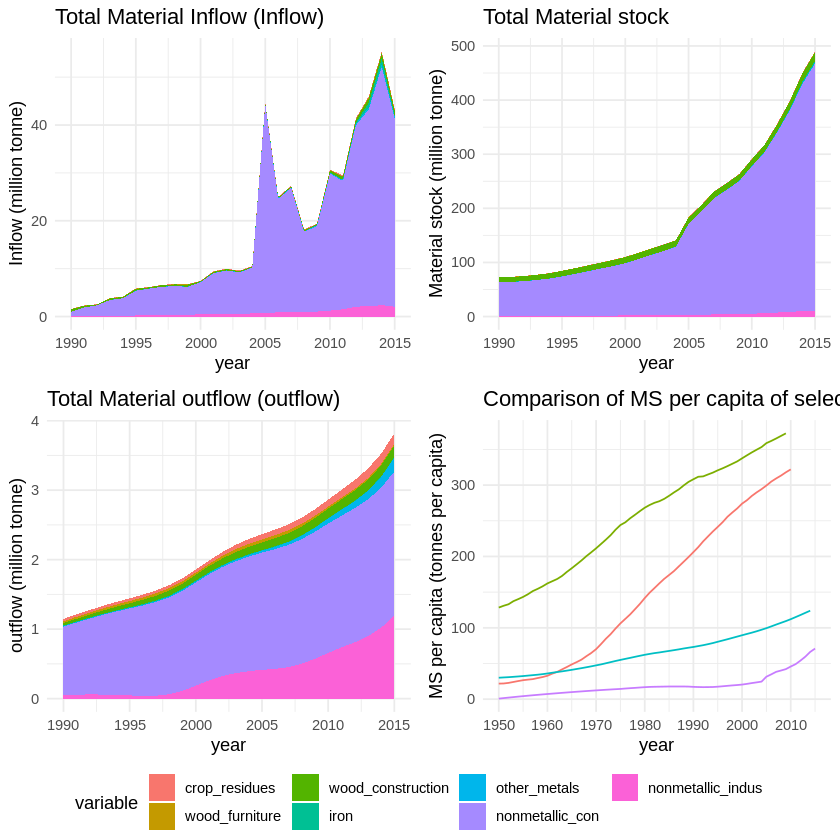

In [ ]:
final_fig <- ggarrange( total_inflow_fig, total_ms_fig, total_outflow_fig, ms_percap_fig, common.legend = TRUE, legend="bottom")
final_fig

#🗺 Plot In-use stock density


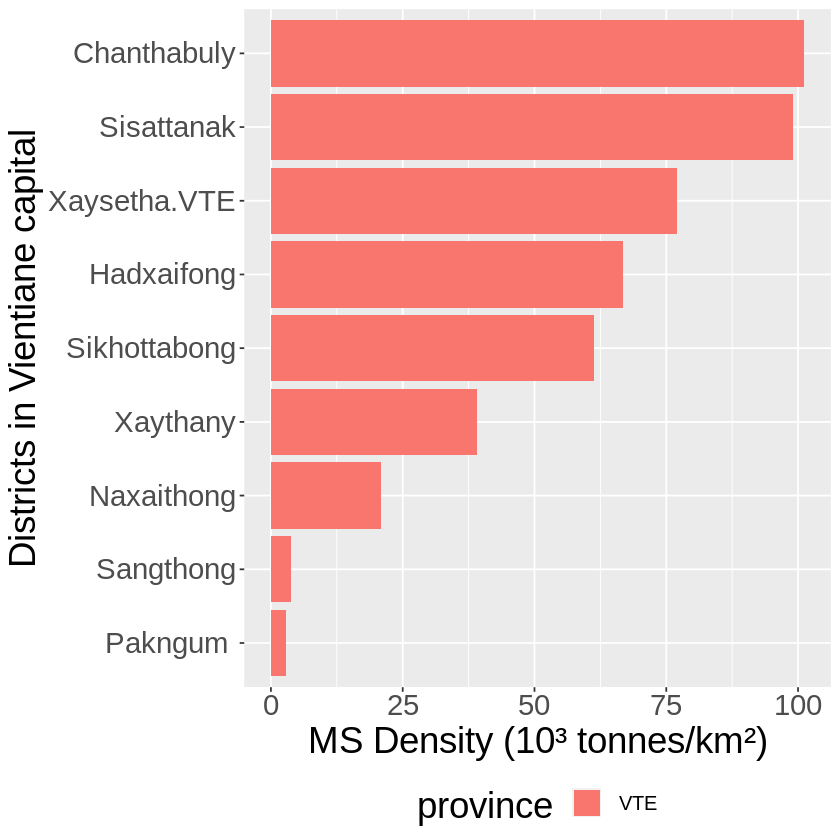

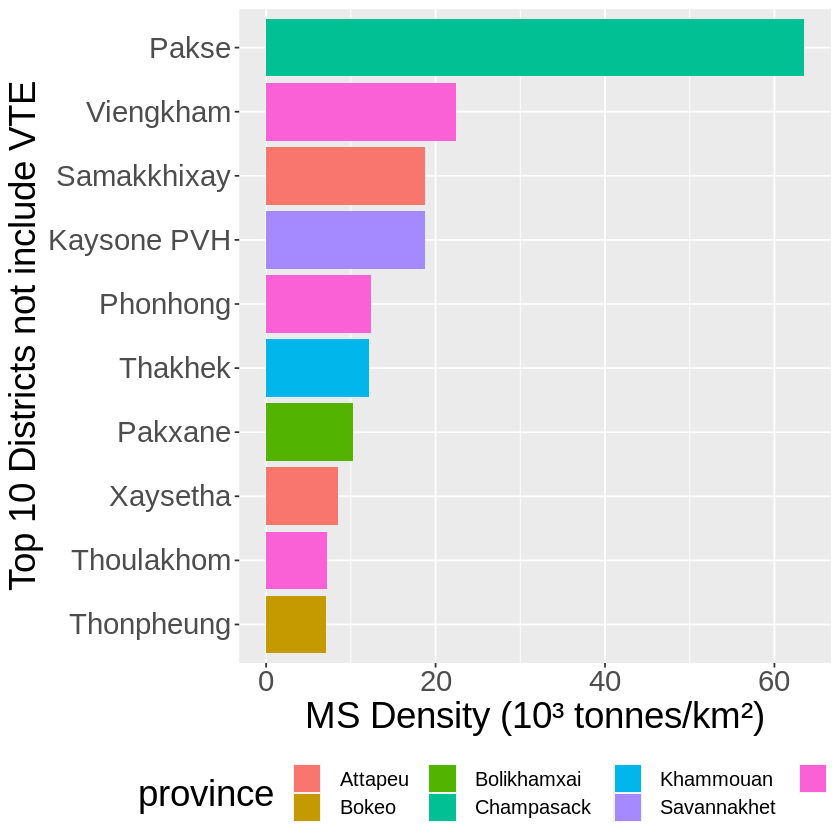

In [ ]:
dt_stock_density <- read.csv("https://raw.githubusercontent.com/xvilaysouk/NTL_DMFA/main/data/stockPerCap_stockPerArea_Laos.csv")

ms_density_VTE_fig <- dt_stock_density %>% dplyr::filter(district != "Vientiane Capital", province == "VTE") %>% dplyr::top_n(10, stockPerArea) %>% ggplot(aes(x= reorder(district, stockPerArea), y = stockPerArea/1000, fill = province)) + geom_bar(stat="identity")+coord_flip() + labs(x = "Districts in Vientiane capital",y = "MS Density (10³ tonnes/km²)") + theme(legend.position="bottom", text = element_text(size=22), legend.text = element_text(size = 12))
ms_density_VTE_fig

ms_density_fig <- dt_stock_density %>% dplyr::filter(district != "Vientiane Capital", province != "VTE") %>% dplyr::top_n(10, stockPerArea) %>% ggplot(aes(x= reorder(district, stockPerArea), y = stockPerArea/1000, fill = province)) + geom_bar(stat="identity")+coord_flip() + labs(x = "Top 10 Districts not include VTE",y = "MS Density (10³ tonnes/km²)") + theme(legend.position="bottom", text = element_text(size=22), legend.text = element_text(size = 12))
ms_density_fig


# Download Data and Clone Code from my github

[![Open In Colab](https://icons-for-free.com/iconfiles/png/128/github+icon-1320168274457504277.png)](https://github.com/xvilaysouk/NTL_DMFA)